# Banking Dataset Personal Project
## By: Joseph Tenerelli

**Dataset Information**: The dataset was gathered from Kaggle and it is a Marketing Targets Banking Dataset for direct marking campaigns of a Portuguese banking institution to get a term deposit (variable "y") (https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets?select=train.csv)

**Summary of Notebook**: In this notebook, I plan to explore the data, transform the cateogrical and numerical data to then run them through a few different models to best predict the marketing teams should target to ensure they are getting a term deposit. At the end of the notebook, after training models, adjusting thresholds, and looking at the confusion matricies, a few conclusion can be made based on the marketing team's strategy/approach.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [2]:
test_data = pd.read_csv('banking test data.csv', sep = ';')
train_data = pd.read_csv('banking train data.csv', sep = ';')
#Files used ";" as separaters instead of commas

In [3]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Features Breakdown:

- 1) age (numeric)
- 2) job: type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
- 3) marital: marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4) education (categorical: "unknown", "secondary", "primary", "tertiary")
- 5) default: has credit in default? (binary: "yes", "no")
- 6) balance: average yearly balance, in euros (numeric)
- 7) housing: has housing loan? (binary: "yes", "no")
- 8) loan: has personal loan? (binary: "yes", "no")

**related with the last contact of the current campaign:**

- 9) contact: contact communication type (categorical: "unknown", "telephone", "cellular")
- 10) day: last contact day of the month (numeric)
- 11) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
- 12) duration: last contact duration, in seconds (numeric)

**other attributes:**

- 13) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15) previous: number of contacts performed before this campaign and for this client (numeric)
- 16) poutcome: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

In [4]:
train_data.info()
#No null's in any of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
train_data.select_dtypes(include=['object']).head()
#Categorical data (few binary with "no", "yes")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [6]:
for column in train_data.select_dtypes(include=['object']).columns:
    print(f"{column}: {train_data[column].unique()}")
    print(f"Total Unique Values: {len(train_data[column].unique())}")
    print("")
    
#Let's see the amount of unique values and their lists

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Total Unique Values: 12

marital: ['married' 'single' 'divorced']
Total Unique Values: 3

education: ['tertiary' 'secondary' 'unknown' 'primary']
Total Unique Values: 4

default: ['no' 'yes']
Total Unique Values: 2

housing: ['yes' 'no']
Total Unique Values: 2

loan: ['no' 'yes']
Total Unique Values: 2

contact: ['unknown' 'cellular' 'telephone']
Total Unique Values: 3

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Total Unique Values: 12

poutcome: ['unknown' 'failure' 'other' 'success']
Total Unique Values: 4

y: ['no' 'yes']
Total Unique Values: 2



In [7]:
train_data.select_dtypes(include=['int64']).head()
#Numeric columns

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Let's Visualize a Few Things

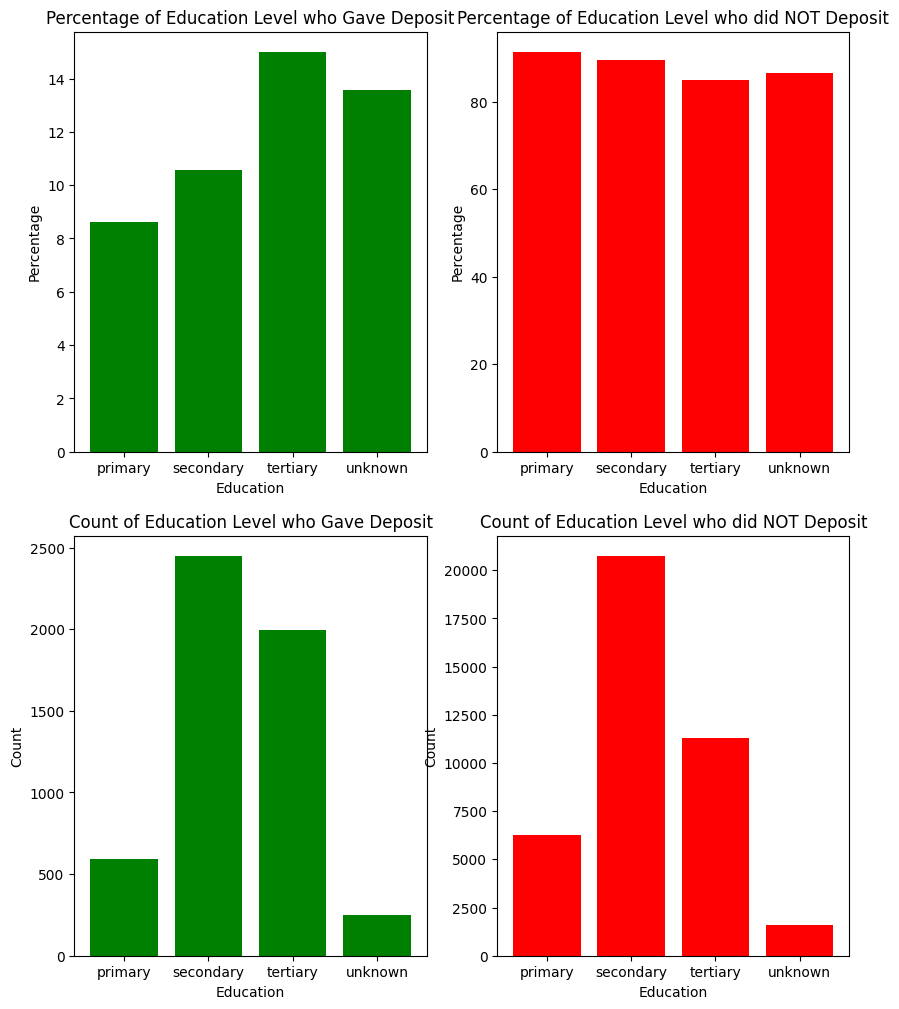

In [8]:
deposit_avg = train_data.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
deposit_counts = train_data.groupby('education')['y'].value_counts().unstack().fillna(0)

fig = plt.figure(figsize =[10, 12])

ax1 = fig.add_subplot(2,2,1)
ax1.bar(deposit_avg['yes'].index, deposit_avg['yes'], color='green')
plt.title('Percentage of Education Level who Gave Deposit')
plt.xlabel('Education')
plt.ylabel('Percentage')


ax2 = fig.add_subplot(2,2,2)
ax2.bar(deposit_avg['no'].index, deposit_avg['no'], color='red')
plt.title('Percentage of Education Level who did NOT Deposit')
plt.xlabel('Education')
plt.ylabel('Percentage')

ax3 = fig.add_subplot(2,2,3)
ax3.bar(deposit_counts['yes'].index, deposit_counts['yes'], color='green')
plt.title('Count of Education Level who Gave Deposit')
plt.xlabel('Education')
plt.ylabel('Count')


ax4 = fig.add_subplot(2,2,4)
ax4.bar(deposit_counts['no'].index, deposit_counts['no'], color='red')
plt.title('Count of Education Level who did NOT Deposit')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()

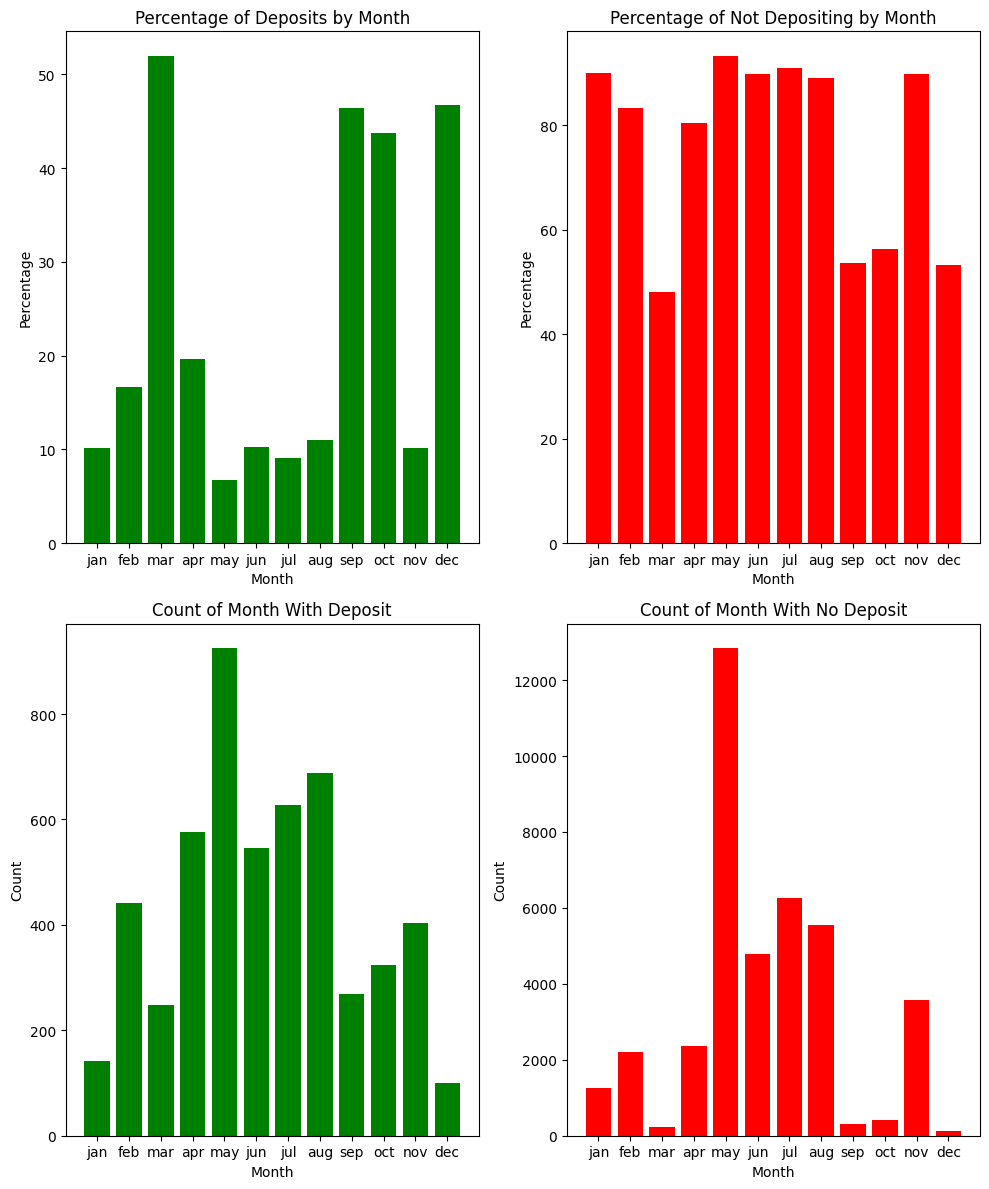

In [42]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_avg = train_data.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
month_avg = month_avg.reindex(month_order, level=0)
month_counts = train_data.groupby('month')['y'].value_counts().unstack().fillna(0)
month_counts = month_counts.reindex(month_order, level=0)

fig = plt.figure(figsize =[10, 12])

ax1 = fig.add_subplot(2,2,1)
ax1.bar(month_avg['yes'].index, month_avg['yes'], color='green')
plt.title('Percentage of Deposits by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')

ax2 = fig.add_subplot(2,2,2)
ax2.bar(month_avg['no'].index, month_avg['no'], color='red')
plt.title('Percentage of Not Depositing by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')

ax3 = fig.add_subplot(2,2,3)
ax3.bar(month_counts['yes'].index, month_counts['yes'], color='green')
plt.title('Count of Month With Deposit')
plt.xlabel('Month')
plt.ylabel('Count')

ax4 = fig.add_subplot(2,2,4)
ax4.bar(month_counts['no'].index, month_counts['no'], color='red')
plt.title('Count of Month With No Deposit')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

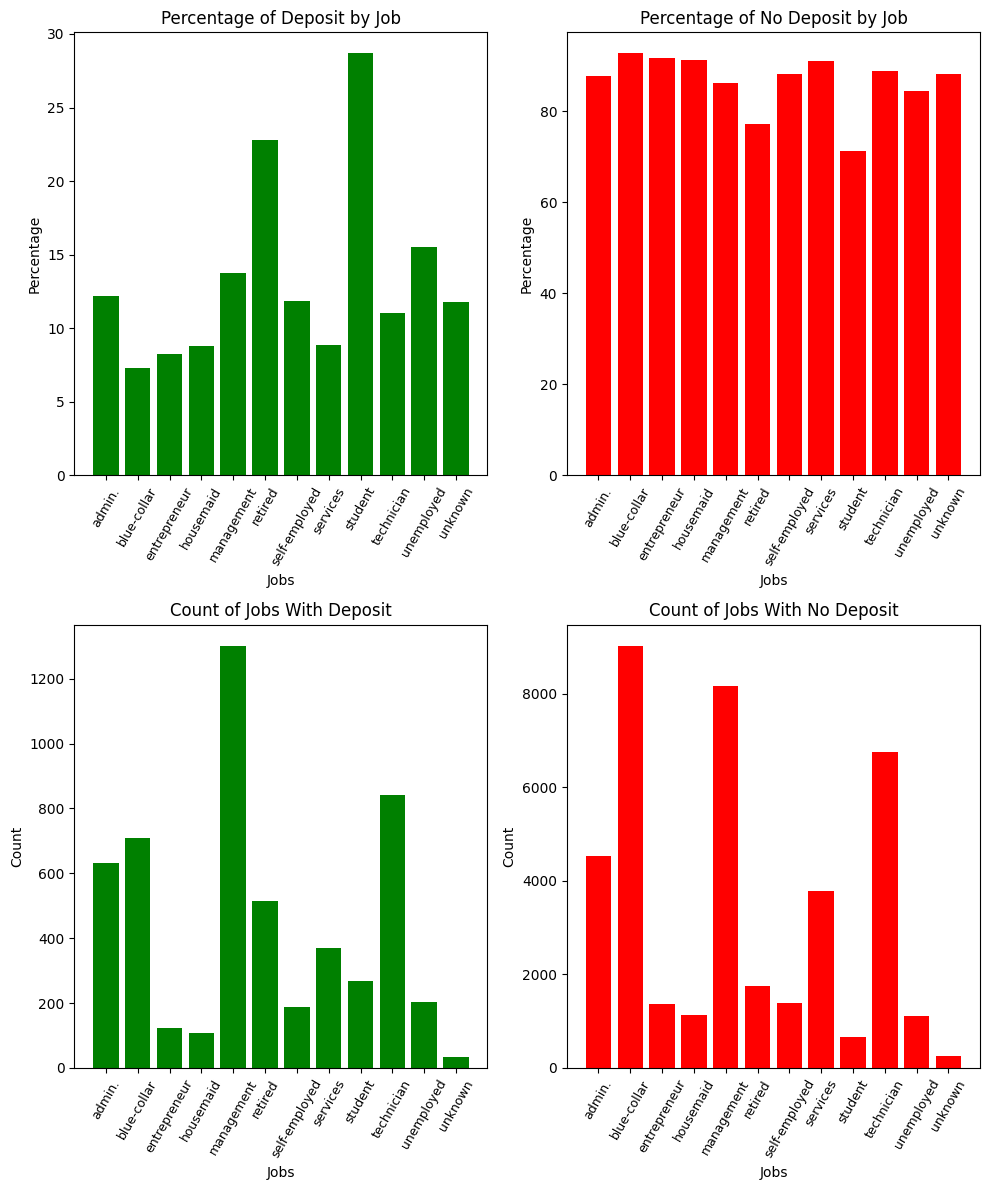

In [41]:
job_avg = train_data.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
job_counts = train_data.groupby('job')['y'].value_counts().unstack().fillna(0)


fig = plt.figure(figsize =[10, 12])

ax1 = fig.add_subplot(2,2,1)
ax1.bar(job_avg['yes'].index, job_avg['yes'], color='green')
plt.title('Percentage of Deposit by Job')
plt.xlabel('Jobs')
plt.ylabel('Percentage')
plt.xticks(size=9, rotation=60)

ax2 = fig.add_subplot(2,2,2)
ax2.bar(job_avg['no'].index, job_avg['no'], color='red')
plt.title('Percentage of No Deposit by Job')
plt.xlabel('Jobs')
plt.ylabel('Percentage')
plt.xticks(size=9, rotation=60)

ax3 = fig.add_subplot(2,2,3)
ax3.bar(job_counts['yes'].index, job_counts['yes'], color='green')
plt.title('Count of Jobs With Deposit')
plt.xlabel('Jobs')
plt.xticks(size=9, rotation=60)
plt.ylabel('Count')

ax4 = fig.add_subplot(2,2,4)
ax4.bar(job_counts['no'].index, job_counts['no'], color='red')
plt.title('Count of Jobs With No Deposit')
plt.xlabel('Jobs')
plt.xticks(size=9, rotation=60)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Now we can Start Modeling

In [11]:
X_train_input = train_data.drop(['y'], axis=1).copy()
X_test_input = test_data.drop(['y'], axis=1).copy()
y_train_input = train_data[['y']].copy()
y_test_input = test_data[['y']].copy()

#The dataset was already split in train and test, so let's keep it as such & added "_input" so I know it's the original

In [12]:
print(X_train_input.shape)
print(X_test_input.shape)
print(y_train_input.shape)
print(y_test_input.shape)

#Checking shape for consistency & correct numbers

(45211, 16)
(4521, 16)
(45211, 1)
(4521, 1)


In [13]:
df_train_categorical = X_train_input[X_train_input.select_dtypes(include=['object']).columns.tolist()]

#Separating the categorical for one hot encoding

In [14]:
X_train_input.select_dtypes(include=['int64']).columns.tolist()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
df_train_numeric = X_train_input[X_train_input.select_dtypes(include=['int64']).columns.tolist()]
#Separating the numerical for scaling as well

In [16]:
X_train_input.select_dtypes(include=['object']).columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [17]:
df_test_categorical = X_test_input[X_test_input.select_dtypes(include=['object']).columns.tolist()]

In [18]:
df_test_numeric = X_test_input[X_test_input.select_dtypes(include=['int64']).columns.tolist()]

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('label_encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, X_train_input.select_dtypes(include=['int64']).columns.tolist()),
        ('cat', categorical_transformer, X_train_input.select_dtypes(include=['object']).columns.tolist())
    ])

X_train = preprocessor.fit_transform(X_train_input)

#This transformer will separate the numerical and categorical columns, perform their respective transformers,
#then return a concatenated transformed data

In [20]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('label_encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, X_test_input.select_dtypes(include=['int64']).columns.tolist()),
        ('cat', categorical_transformer, X_test_input.select_dtypes(include=['object']).columns.tolist())
    ])

X_test = preprocessor.fit_transform(X_test_input)

#Same, but on the test data

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_input['y'].values)

#Label encode the y (could also one hot encode here since it's binary)

In [22]:
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test_input['y'].values)

In [23]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

#Check shapes again for consistency

X_train:  (45211, 42)
X_test:  (4521, 42)
y_train:  (45211,)
y_test:  (4521,)


### Model: Gradient Booster Classifier

In [24]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth':list(np.arange(1, 33, 4)),
    'n_estimators':np.arange(50, 400, 50),
    'learning_rate':[0.1, 0.5, 1.0],
}


gbrt = XGBClassifier(random_state=42)
gbrt_model = RandomizedSearchCV(
    estimator = gbrt,
    param_distributions = param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

gbrt_model.fit(X_train, y_train)

print("The best parameters are: ", gbrt_model.best_params_)

The best parameters are:  {'n_estimators': 250, 'max_depth': 1, 'learning_rate': 0.5}


In [25]:
y_pred = gbrt_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('')
print('Confusion Matrix:')
print(confusion)
print('')
print('Classification Report:')
print(report)

Accuracy: 0.9015704490157045

Confusion Matrix:
[[3886  114]
 [ 331  190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4000
           1       0.62      0.36      0.46       521

    accuracy                           0.90      4521
   macro avg       0.77      0.67      0.70      4521
weighted avg       0.89      0.90      0.89      4521



In [27]:
#Adjusting the threshold of '1' and '0' predictions to see if we can increase accuracy/precision and recall

threshold_adjusted = 0.4

y_pred_adjusted = (gbrt_model.predict_proba(X_test)[:, 1] >= threshold_adjusted).astype(int)

In [28]:
accuracy = accuracy_score(y_test, y_pred_adjusted)
confusion = confusion_matrix(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)

print(f'Accuracy: {accuracy}')
print('')
print('Confusion Matrix:')
print(confusion)
print('')
print('Classification Report:')
print(report)

Accuracy: 0.9017916390179164

Confusion Matrix:
[[3832  168]
 [ 276  245]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4000
           1       0.59      0.47      0.52       521

    accuracy                           0.90      4521
   macro avg       0.76      0.71      0.73      4521
weighted avg       0.89      0.90      0.90      4521



### Model: Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

param_grid_rf = {
    'max_depth':list(np.arange(10, 25, 5)),
    'n_estimators':np.arange(100, 400, 50),
    'min_samples_split':np.arange(3, 7)
}

rf_classifier = RandomForestClassifier(random_state=42)
rf_model = RandomizedSearchCV(
    estimator = rf_classifier,
    param_distributions = param_grid_rf,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("The best parameters are: ", rf_model.best_params_)
print("The best model: ", rf_model.best_estimator_)

#Perform a parameter grid search to ensure we are building an effective model without too much overfitting

The best parameters are:  {'n_estimators': 250, 'min_samples_split': 4, 'max_depth': 10}
The best model:  RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=250,
                       random_state=42)


In [30]:
y_pred_rf = rf_model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred_rf)
confusion = confusion_matrix(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')
print('')
print('Confusion Matrix:')
print(confusion)
print('')
print('Classification Report:')
print(report)

Accuracy: 0.9059942490599425

Confusion Matrix:
[[3979   21]
 [ 404  117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.85      0.22      0.36       521

    accuracy                           0.91      4521
   macro avg       0.88      0.61      0.65      4521
weighted avg       0.90      0.91      0.88      4521



In [32]:
#Let's see if we can get some more accuracy by adjusting the threshold of which is a "1" and which is a "0".

threshold_adjusted = 0.3

y_pred_rf_adjusted = (rf_model.predict_proba(X_test)[:, 1] >= threshold_adjusted).astype(int)

In [33]:
accuracy = accuracy_score(y_test, y_pred_rf_adjusted)
confusion = confusion_matrix(y_test, y_pred_rf_adjusted)
report = classification_report(y_test, y_pred_rf_adjusted)

print(f'Accuracy: {accuracy}')
print('')
print('Confusion Matrix:')
print(confusion)
print('')
print('Classification Report:')
print(report)

Accuracy: 0.9110816191108162

Confusion Matrix:
[[3769  231]
 [ 171  350]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4000
           1       0.60      0.67      0.64       521

    accuracy                           0.91      4521
   macro avg       0.78      0.81      0.79      4521
weighted avg       0.92      0.91      0.91      4521



### Model: SVC

In [34]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', C=1.0, random_state=42)
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [35]:
y_pred_svc = svc_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred_svc)
confusion = confusion_matrix(y_test, y_pred_svc)
report = classification_report(y_test, y_pred_svc)

print(f'Accuracy: {accuracy}')
print('')
print('Confusion Matrix:')
print(confusion)
print('')
print('Classification Report:')
print(report)

Accuracy: 0.9163901791639018

Confusion Matrix:
[[3941   59]
 [ 319  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.95      4000
           1       0.77      0.39      0.52       521

    accuracy                           0.92      4521
   macro avg       0.85      0.69      0.74      4521
weighted avg       0.91      0.92      0.90      4521



#### Conclusion:

Looking at all of the confusion matricies of the models with and without thershold adjustments, one could conclude a few different conclusions about the models. If we are looking to make maximum profit and contact as many positives as possible, then the model with the highest True Positives and lowest False Negatives would be optimal (assuming the company is okay with overlooking the False Positives that might take up time). This would be the *RandomForestClassifier* model without threshold adjustment.

However, if the goal is to not call anyone who would possibly waste time and become annoyed (for political/relationship reasons), we would want the lowest False Positives, which would be the the *Adjusted Threshold RandomForestClassifier*